# MSiA 432 - Deep Learning - Final Project
## Group: Alejandra Lelo de Larrea Ibarra, Bannasorn Paspanthong, Ruben Nakano, Samuel Swain
# Style Transfering: Voldemort
Reference: https://anderfernandez.com/en/blog/how-to-code-neural-style-transfer-in-python/

In [1]:
# Import libraries 
from datetime import datetime
import tensorflow as tf
import numpy as np
from PIL import Image as im 

import keras
from keras import Model
from keras.utils import get_file, plot_model
from keras.optimizers import SGD
from tensorflow.keras.applications import vgg19, vgg16

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from pathlib import Path
import style_transfering as st

In [2]:
# Try to activate GPUs 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print (f'Found GPU at {device_name}')

Found GPU at /device:GPU:0Metal device set to: Apple M1 Pro



In [3]:
# --- Common Parameters for all experiments ---

# Select base and style image
base_path = Path("../02_Data/face_age/010/755.png")
style_path = Path("../02_Data/Style Photos/Voldemort.jpeg")

# Define layers to extract for the style and content 
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1",]
content_layers = ["block5_conv2"]

# Select pre-trained model
mod_name = "vgg19"
model = vgg19.VGG19(weights="imagenet", include_top=False)

# Dictionary of layers in the model: map layer names to outputs
outputs_dict= dict([(layer.name, layer.output) for layer in model.layers])

# New model: same model inputs, outputs as specified in outputs_dict
feature_extractor = Model(inputs = model.inputs, outputs = outputs_dict)

# Set optimization parameters
learning_rate = 100.0
decay_steps = 100
decay_rate = 0.96
n_iter = 5000

2023-05-14 12:09:25.224645: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Iteration 100: loss=8453.15
Iteration 200: loss=5682.45
Iteration 300: loss=4667.19
Iteration 400: loss=4073.45
Iteration 500: loss=3686.45
Iteration 600: loss=3402.05
Iteration 700: loss=3187.02
Iteration 800: loss=3012.68
Iteration 900: loss=2868.12
Iteration 1000: loss=2743.70
Iteration 1100: loss=2636.97
Iteration 1200: loss=2544.54
Iteration 1300: loss=2461.30
Iteration 1400: loss=2386.51
Iteration 1500: loss=2318.46
Iteration 1600: loss=2256.81
Iteration 1700: loss=2203.65
Iteration 1800: loss=2152.75
Iteration 1900: loss=2106.85
Iteration 2000: loss=2065.61
Iteration 2100: loss=2027.83
Iteration 2200: loss=1993.36
Iteration 2300: loss=1961.72
Iteration 2400: loss=1932.21
Iteration 2500: loss=1904.97
Iteration 2600: loss=1879.44
Iteration 2700: loss=1855.66
Iteration 2800: loss=1833.27
Iteration 2900: loss=1812.53
Iteration 3000: loss=1793.22
Iteration 3100: loss=1775.35
Iteration 3200: loss=1758.57
Iteration 3300: loss=1742.88
Iteration 3400: loss=1728.05
Iteration 3500: loss=17

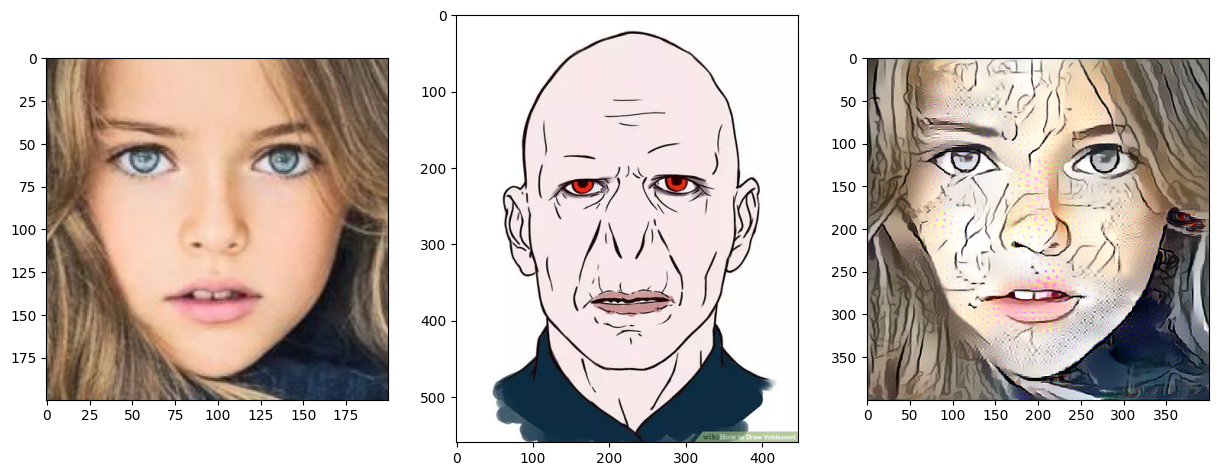

In [4]:
# --- Experiment 1: ----
final_img_path= Path("Results/HP/Voldemort_E1.png")
style_weight = 1e-6
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()


Iteration 100: loss=1779.64
Iteration 200: loss=1313.02
Iteration 300: loss=1101.11
Iteration 400: loss=978.49
Iteration 500: loss=895.68
Iteration 600: loss=834.33
Iteration 700: loss=786.56
Iteration 800: loss=748.08
Iteration 900: loss=716.06
Iteration 1000: loss=689.02
Iteration 1100: loss=665.79
Iteration 1200: loss=645.64
Iteration 1300: loss=627.85
Iteration 1400: loss=612.09
Iteration 1500: loss=598.11
Iteration 1600: loss=585.62
Iteration 1700: loss=574.42
Iteration 1800: loss=564.31
Iteration 1900: loss=555.13
Iteration 2000: loss=546.72
Iteration 2100: loss=538.97
Iteration 2200: loss=531.85
Iteration 2300: loss=525.29
Iteration 2400: loss=519.19
Iteration 2500: loss=513.54
Iteration 2600: loss=508.30
Iteration 2700: loss=503.42
Iteration 2800: loss=498.88
Iteration 2900: loss=494.63
Iteration 3000: loss=490.64
Iteration 3100: loss=486.91
Iteration 3200: loss=483.42
Iteration 3300: loss=480.15
Iteration 3400: loss=477.07
Iteration 3500: loss=474.17
Iteration 3600: loss=471.4

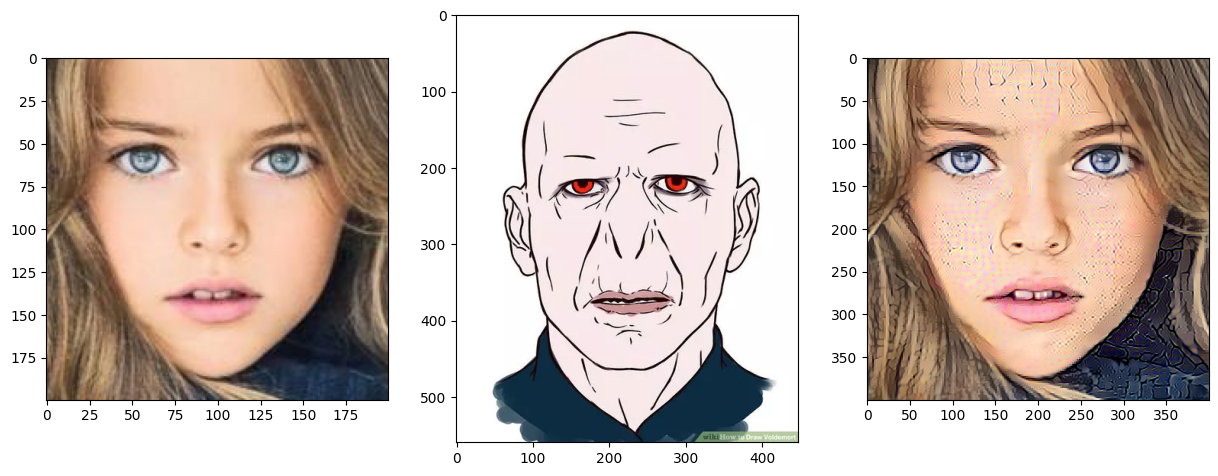

In [5]:
# --- Experiment 2: ----
final_img_path= Path("Results/HP/Voldemort_E2.png")
style_weight = 2.5e-8
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=9138.59
Iteration 200: loss=6338.23
Iteration 300: loss=5288.49
Iteration 400: loss=4689.61
Iteration 500: loss=4293.20
Iteration 600: loss=4003.66
Iteration 700: loss=3789.91
Iteration 800: loss=3613.86
Iteration 900: loss=3455.37
Iteration 1000: loss=3326.00
Iteration 1100: loss=3216.89
Iteration 1200: loss=3122.05
Iteration 1300: loss=3037.08
Iteration 1400: loss=2963.52
Iteration 1500: loss=2897.97
Iteration 1600: loss=2839.01
Iteration 1700: loss=2785.42
Iteration 1800: loss=2736.80
Iteration 1900: loss=2692.60
Iteration 2000: loss=2651.46
Iteration 2100: loss=2613.93
Iteration 2200: loss=2578.36
Iteration 2300: loss=2546.12
Iteration 2400: loss=2516.50
Iteration 2500: loss=2488.98
Iteration 2600: loss=2463.67
Iteration 2700: loss=2440.12
Iteration 2800: loss=2418.15
Iteration 2900: loss=2397.59
Iteration 3000: loss=2378.42
Iteration 3100: loss=2360.56
Iteration 3200: loss=2343.68
Iteration 3300: loss=2327.62
Iteration 3400: loss=2312.46
Iteration 3500: loss=22

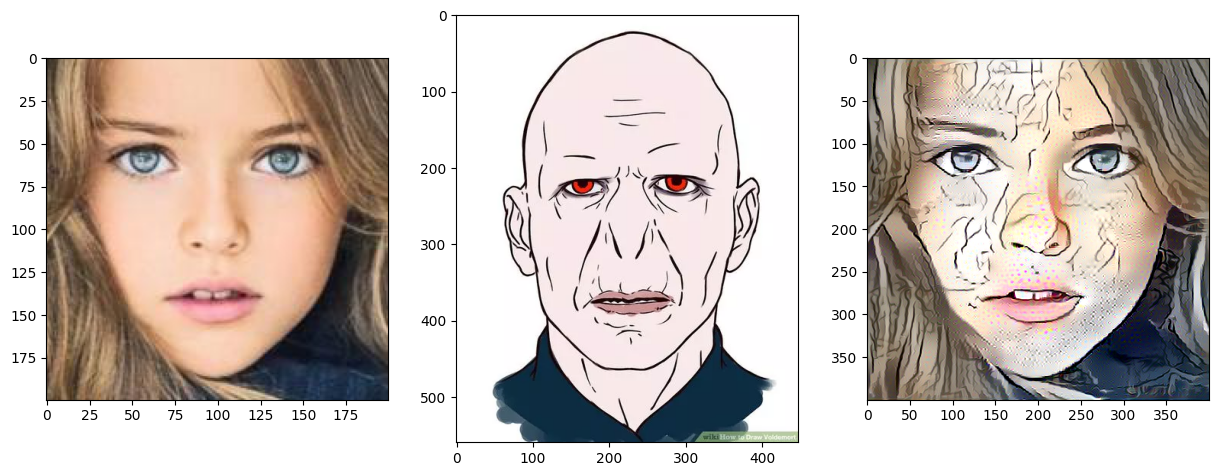

In [6]:
# --- Experiment 3: ----
final_img_path= Path("Results/HP/Voldemort_E3.png")
style_weight = 1e-6
content_weight = 1e-6

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=1486.06
Iteration 200: loss=1055.87
Iteration 300: loss=870.79
Iteration 400: loss=765.20
Iteration 500: loss=693.05
Iteration 600: loss=638.85
Iteration 700: loss=596.00
Iteration 800: loss=561.29
Iteration 900: loss=532.55
Iteration 1000: loss=508.34
Iteration 1100: loss=487.48
Iteration 1200: loss=469.40
Iteration 1300: loss=453.58
Iteration 1400: loss=439.57
Iteration 1500: loss=427.10
Iteration 1600: loss=415.99
Iteration 1700: loss=405.99
Iteration 1800: loss=396.91
Iteration 1900: loss=388.66
Iteration 2000: loss=381.13
Iteration 2100: loss=374.26
Iteration 2200: loss=367.93
Iteration 2300: loss=362.09
Iteration 2400: loss=356.69
Iteration 2500: loss=351.67
Iteration 2600: loss=347.00
Iteration 2700: loss=342.66
Iteration 2800: loss=338.61
Iteration 2900: loss=334.82
Iteration 3000: loss=331.28
Iteration 3100: loss=327.96
Iteration 3200: loss=324.84
Iteration 3300: loss=321.92
Iteration 3400: loss=319.18
Iteration 3500: loss=316.61
Iteration 3600: loss=314.20

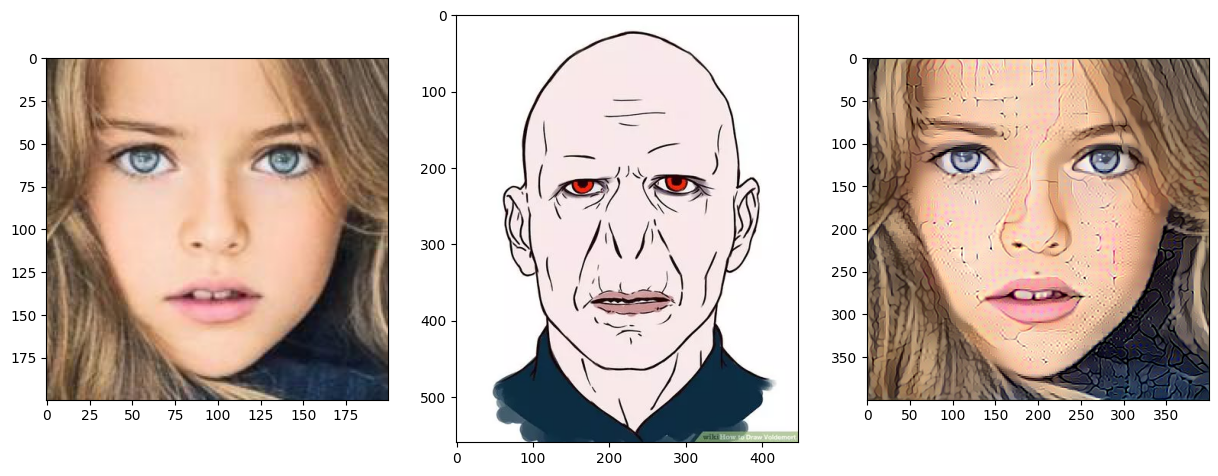

In [7]:
# --- Experiment 4: ----
final_img_path= Path("Results/HP/Voldemort_E4.png")
style_weight = 2.5e-8
content_weight = 2.5e-8

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()

Iteration 100: loss=4111.01
Iteration 200: loss=2769.87
Iteration 300: loss=2167.63
Iteration 400: loss=1818.10
Iteration 500: loss=1594.36
Iteration 600: loss=1440.67
Iteration 700: loss=1328.46
Iteration 800: loss=1242.02
Iteration 900: loss=1174.25
Iteration 1000: loss=1119.61
Iteration 1100: loss=1074.52
Iteration 1200: loss=1037.01
Iteration 1300: loss=1005.24
Iteration 1400: loss=977.88
Iteration 1500: loss=953.88
Iteration 1600: loss=932.70
Iteration 1700: loss=913.93
Iteration 1800: loss=897.18
Iteration 1900: loss=882.09
Iteration 2000: loss=868.19
Iteration 2100: loss=855.03
Iteration 2200: loss=843.35
Iteration 2300: loss=832.81
Iteration 2400: loss=823.11
Iteration 2500: loss=814.16
Iteration 2600: loss=805.90
Iteration 2700: loss=798.20
Iteration 2800: loss=790.98
Iteration 2900: loss=784.19
Iteration 3000: loss=777.86
Iteration 3100: loss=771.98
Iteration 3200: loss=766.50
Iteration 3300: loss=761.37
Iteration 3400: loss=756.56
Iteration 3500: loss=752.05
Iteration 3600: 

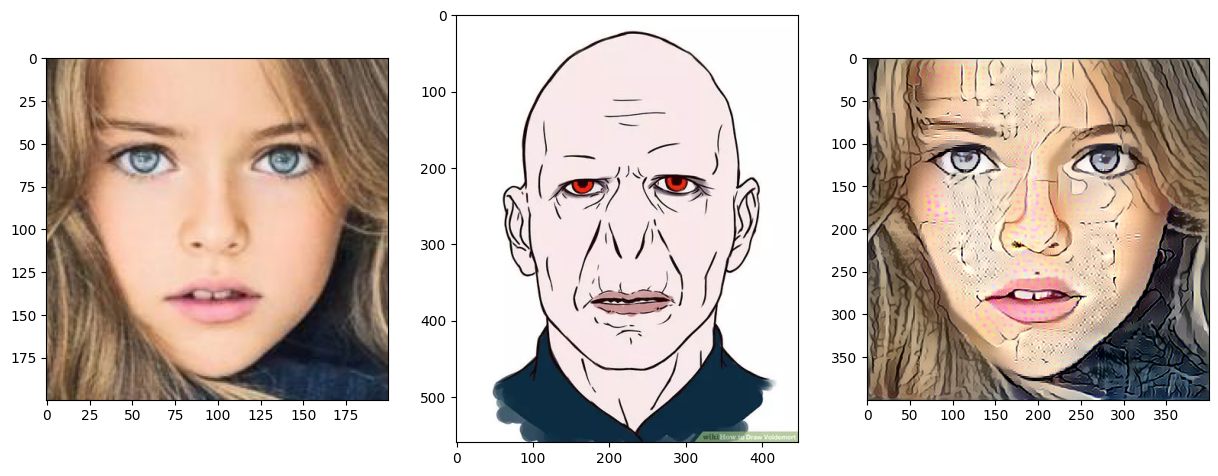

In [8]:
# --- Experiment 5: ----
final_img_path= Path("Results/HP/Voldemort_E5.png")
style_weight = 2e-7
content_weight = 1e-10

# Run transfer learning
new_img = st.train_StyleTransfer(style_path = style_path, base_path = base_path, n_iter = n_iter,
                                 style_layers = style_layers, content_layers = content_layers,
                                 style_weight = style_weight, content_weight = content_weight,
                                 final_img_path = final_img_path, feature_extractor = feature_extractor,
                                 mod_name = mod_name, learning_rate = learning_rate,
                                 decay_steps = decay_steps, decay_rate = decay_rate)

# --- Visualize the images ---
base_img = plt.imread(base_path)
style_img = plt.imread(style_path)

fig, ax = plt.subplots(1, 3, figsize = (15,15))
ax[0].imshow(base_img)
ax[1].imshow(style_img)
ax[2].imshow(new_img)
plt.show()